# Get Data

In [6]:
!curl -L -o ../data/sleep-efficiency.zip https://www.kaggle.com/api/v1/datasets/download/equilibriumm/sleep-efficiency
!unzip ../data/sleep-efficiency.zip -d ../data/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  9150  100  9150    0     0  35782      0 --:--:-- --:--:-- --:--:-- 35782
Archive:  ../data/sleep-efficiency.zip
  inflating: ../data//Sleep_Efficiency.csv  


# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/Sleep_Efficiency.csv')

df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


Our goal is to estimate `Sleep Efficiency`.

Before going further, let us drop `ID` column first.

In [213]:
df = df.drop('ID', axis=1)

In [214]:
df.shape

(452, 14)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    object 
 2   Bedtime                 452 non-null    object 
 3   Wakeup time             452 non-null    object 
 4   Sleep duration          452 non-null    float64
 5   Sleep efficiency        452 non-null    float64
 6   REM sleep percentage    452 non-null    int64  
 7   Deep sleep percentage   452 non-null    int64  
 8   Light sleep percentage  452 non-null    int64  
 9   Awakenings              432 non-null    float64
 10  Caffeine consumption    427 non-null    float64
 11  Alcohol consumption     438 non-null    float64
 12  Smoking status          452 non-null    object 
 13  Exercise frequency      446 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory 

In [217]:
# Change data type of datetime columns

df.columns = df.columns.str.lower().str.replace(' ', '_')

df['bedtime']=pd.to_datetime(df['bedtime'])
df['wakeup_time']=pd.to_datetime(df['wakeup_time'])

In [108]:
df.isnull().sum()

age                        0
gender                     0
bedtime                    0
wakeup_time                0
sleep_duration             0
sleep_efficiency           0
rem_sleep_percentage       0
deep_sleep_percentage      0
light_sleep_percentage     0
awakenings                20
caffeine_consumption      25
alcohol_consumption       14
smoking_status             0
exercise_frequency         6
dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   age                     452 non-null    int64         
 1   gender                  452 non-null    object        
 2   bedtime                 452 non-null    datetime64[ns]
 3   wakeup_time             452 non-null    datetime64[ns]
 4   sleep_duration          452 non-null    float64       
 5   sleep_efficiency        452 non-null    float64       
 6   rem_sleep_percentage    452 non-null    int64         
 7   deep_sleep_percentage   452 non-null    int64         
 8   light_sleep_percentage  452 non-null    int64         
 9   awakenings              432 non-null    float64       
 10  caffeine_consumption    427 non-null    float64       
 11  alcohol_consumption     438 non-null    float64       
 12  smoking_status          452 non-null    object    

## Scatterplot for numerical columns with `sleep_efficiency`

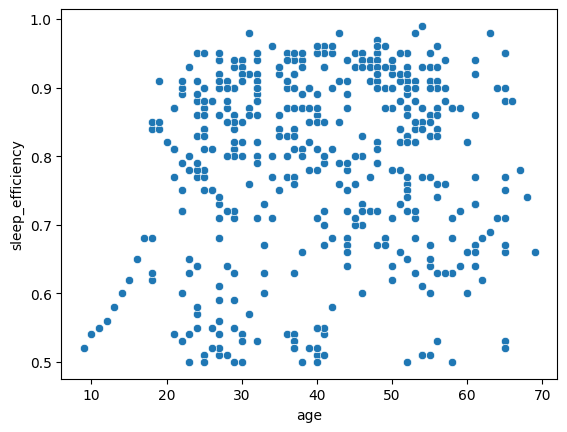

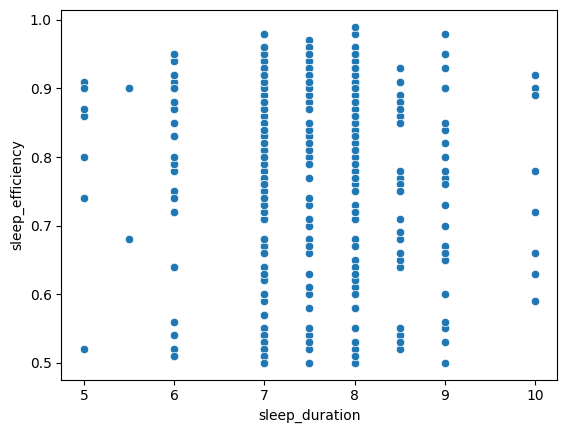

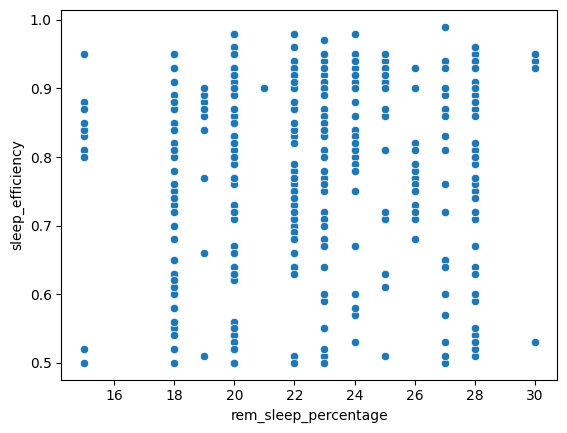

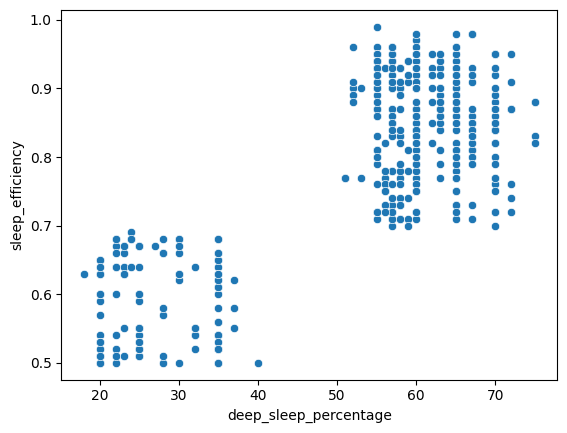

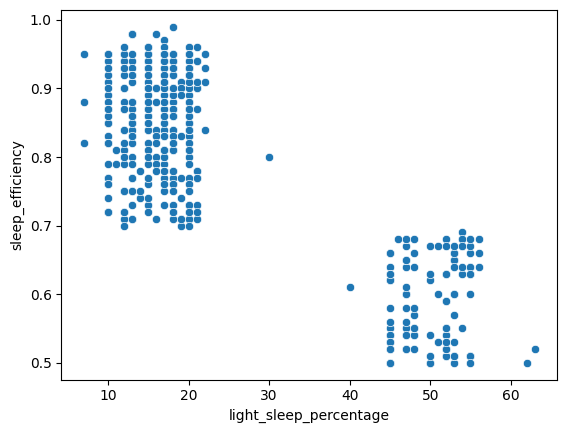

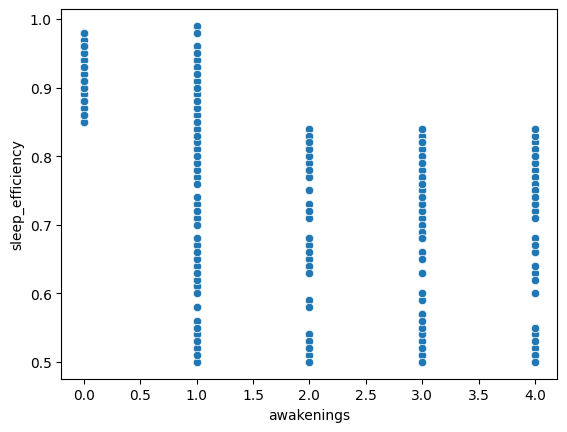

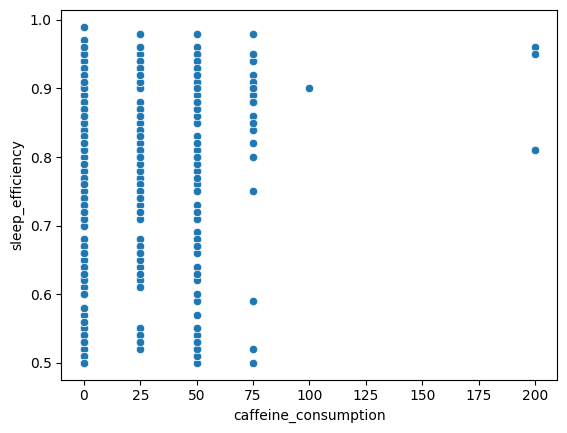

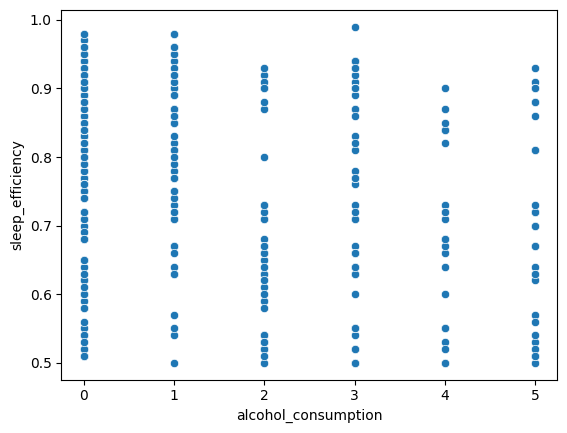

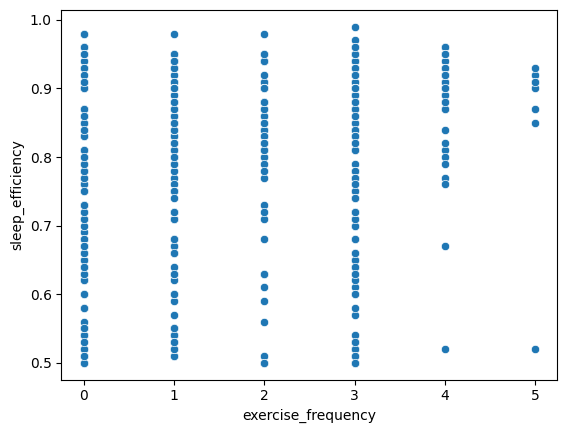

In [110]:
numerical_columns = df.select_dtypes(include=['number']).columns

for column in numerical_columns:
    if column != 'sleep_efficiency':
        sns.scatterplot(data=df, x=column, y='sleep_efficiency')
        plt.show()

Let us check the behavior of `sleep_efficiency` with `bedtime` and `wakeup_time`, only with its time.

In [218]:
df['sleep_time'] = df['bedtime'].dt.hour + df['bedtime'].dt.minute / 60 + df['bedtime'].dt.second / 3600
df['getup_time'] = df['wakeup_time'].dt.hour + df['wakeup_time'].dt.minute / 60 + df['wakeup_time'].dt.second / 3600

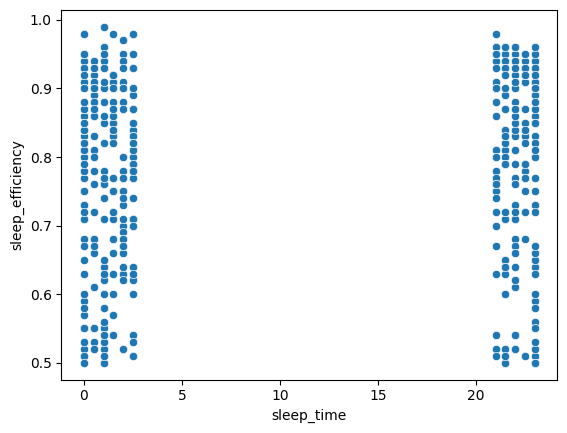

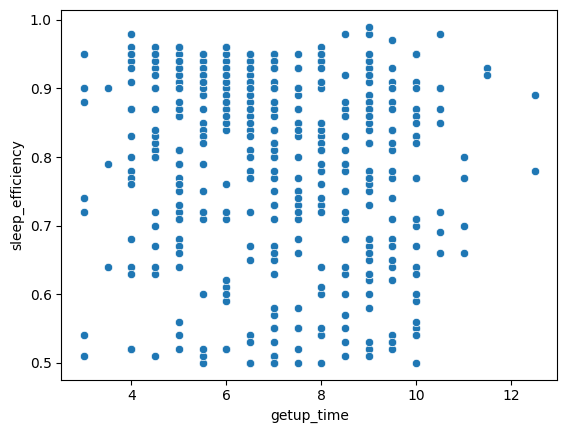

In [112]:
sns.scatterplot(data=df, x='sleep_time', y='sleep_efficiency')
plt.show()

sns.scatterplot(data=df, x='getup_time', y='sleep_efficiency')
plt.show()

## Correlation

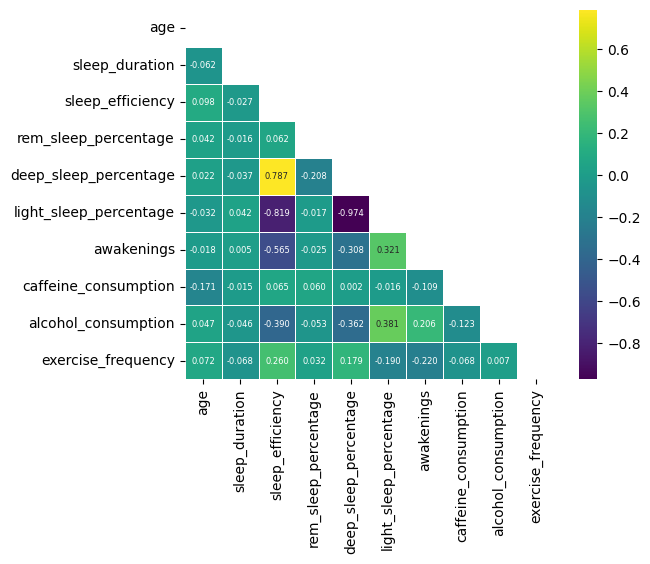

In [113]:
corr = df[numerical_columns].corr()

mask = np.triu(np.ones_like(corr, dtype=bool) )

sns.heatmap(corr, mask=mask, annot=True, fmt=".3f", cmap='viridis', linewidths=0.5, square=True, annot_kws={"size": 6})
plt.show()

## Column distributions through histograms

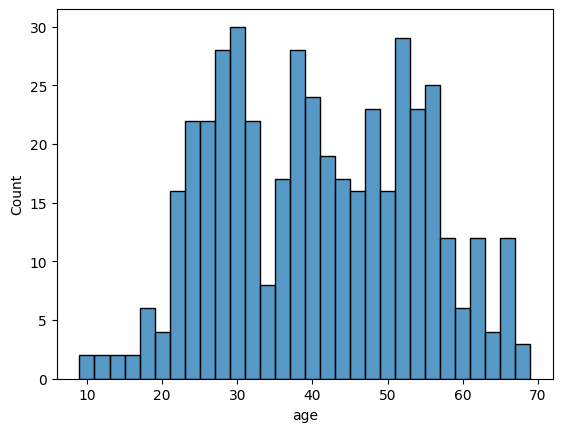

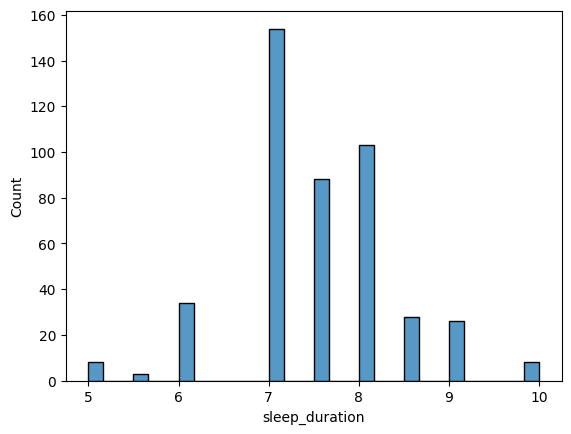

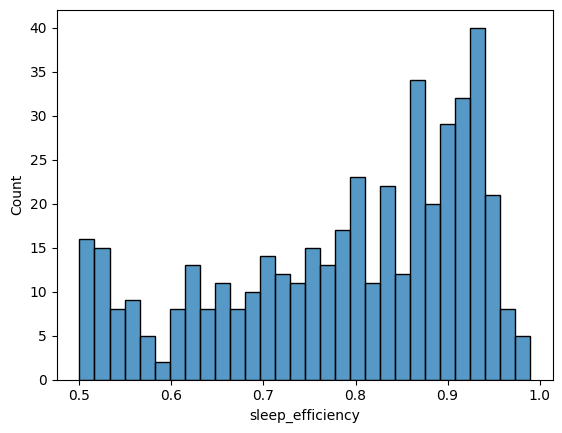

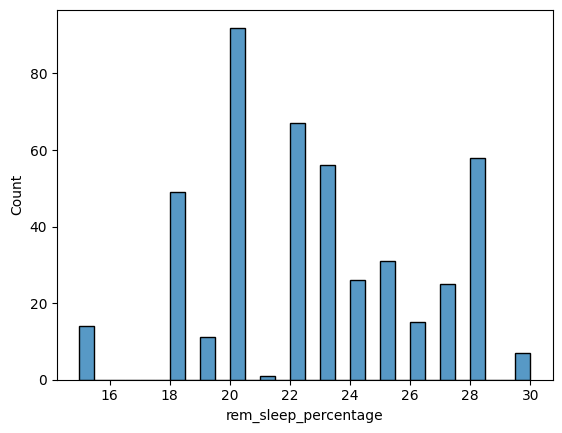

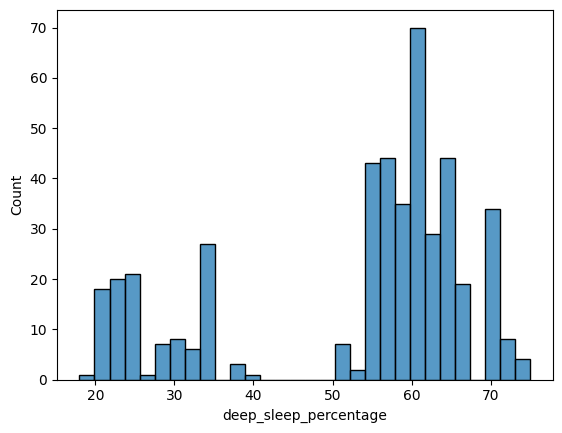

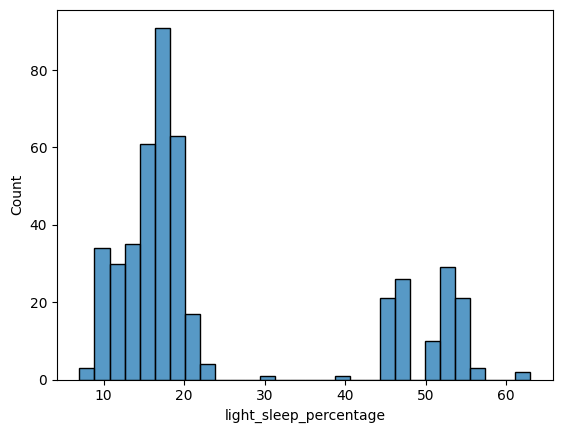

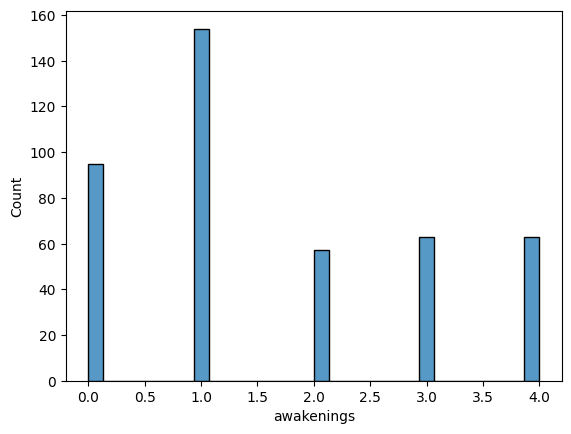

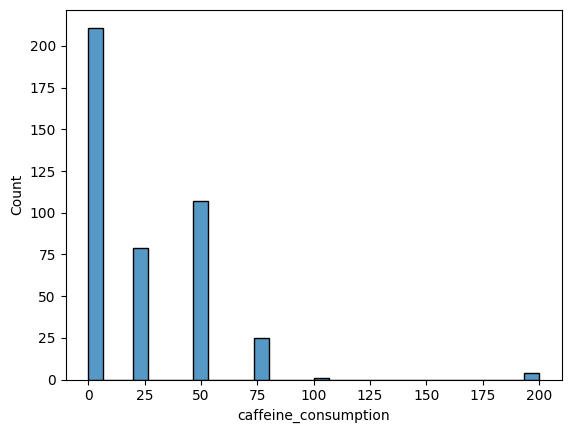

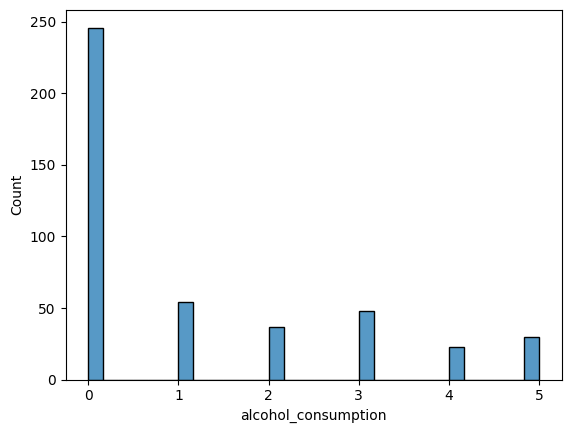

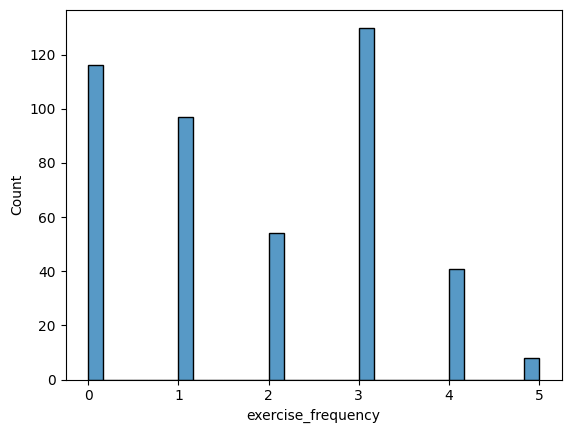

In [114]:
for column in numerical_columns:
    sns.histplot(data=df, x=column, bins=30)
    plt.show()

### Imputation

In [219]:
df.columns[df.isnull().any()]

Index(['awakenings', 'caffeine_consumption', 'alcohol_consumption',
       'exercise_frequency'],
      dtype='object')

Except `exercise_frequency`, the distribution is highly skewed, therefore we will replace `NaNs` in them with mode, while replace `NaNs` in `exercise_frequency` as its mean.

In [220]:
df['exercise_frequency'] = df['exercise_frequency'].fillna(df['exercise_frequency'].mean())

df['awakenings'] = df['awakenings'].fillna(df['awakenings'].mean())
df['caffeine_consumption'] = df['caffeine_consumption'].fillna(df['caffeine_consumption'].mean())
df['alcohol_consumption'] = df['alcohol_consumption'].fillna(df['alcohol_consumption'].mean())

In [221]:
df.columns[df.isnull().any()]

Index([], dtype='object')

# Feature engineering

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   age                     452 non-null    int64         
 1   gender                  452 non-null    object        
 2   bedtime                 452 non-null    datetime64[ns]
 3   wakeup_time             452 non-null    datetime64[ns]
 4   sleep_duration          452 non-null    float64       
 5   sleep_efficiency        452 non-null    float64       
 6   rem_sleep_percentage    452 non-null    int64         
 7   deep_sleep_percentage   452 non-null    int64         
 8   light_sleep_percentage  452 non-null    int64         
 9   awakenings              452 non-null    float64       
 10  caffeine_consumption    452 non-null    float64       
 11  alcohol_consumption     452 non-null    float64       
 12  smoking_status          452 non-null    object    

First, note that `light_sleep_percentage` + `deep_sleep_percentage` + `rem_sleep_percentage` is 100

In [223]:
((df['light_sleep_percentage'] + df['deep_sleep_percentage'] + df['rem_sleep_percentage']) == 100).sum()

np.int64(452)

Therefore, we can drop `rem_sleep_percentage` in our feature.

In [224]:
df = df.drop('rem_sleep_percentage', axis=1)

Also, previously, we defined `sleep_time` and `getup_time` from `bedtime` and `wakeup_time` by changing it from `datetime` to `float`. (We will assume that the date does not affect the sleep efficiency here.) So we can drop these two columns, too.

In [225]:
df = df.drop('bedtime', axis=1)
df = df.drop('wakeup_time', axis=1)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     452 non-null    int64  
 1   gender                  452 non-null    object 
 2   sleep_duration          452 non-null    float64
 3   sleep_efficiency        452 non-null    float64
 4   deep_sleep_percentage   452 non-null    int64  
 5   light_sleep_percentage  452 non-null    int64  
 6   awakenings              452 non-null    float64
 7   caffeine_consumption    452 non-null    float64
 8   alcohol_consumption     452 non-null    float64
 9   smoking_status          452 non-null    object 
 10  exercise_frequency      452 non-null    float64
 11  sleep_time              452 non-null    float64
 12  getup_time              452 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 46.0+ KB


In [227]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [228]:
df['smoking_status'].unique()

array(['Yes', 'No'], dtype=object)

For object columns, `gender` and `smoking_status`, since they are binary, let us map them by 0 and 1:

For gender, `male=0` and `female=1`. For, smoking status, `Yes=1` and `No=1`.

In [229]:
df['gender'] = df['gender'].map({'Female':1, 'Male': 0})
df['smoking_status'] = df['smoking_status'].map({'Yes':1, 'No': 0})

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     452 non-null    int64  
 1   gender                  452 non-null    int64  
 2   sleep_duration          452 non-null    float64
 3   sleep_efficiency        452 non-null    float64
 4   deep_sleep_percentage   452 non-null    int64  
 5   light_sleep_percentage  452 non-null    int64  
 6   awakenings              452 non-null    float64
 7   caffeine_consumption    452 non-null    float64
 8   alcohol_consumption     452 non-null    float64
 9   smoking_status          452 non-null    int64  
 10  exercise_frequency      452 non-null    float64
 11  sleep_time              452 non-null    float64
 12  getup_time              452 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 46.0 KB


Let us finish feature engineering by saving this cleaned data:

In [246]:
df.to_csv("../data/sleep-efficiency_cleaned.csv", index=False)

# Modeling

In [247]:
df = pd.read_csv("../data/sleep-efficiency_cleaned.csv")

In [248]:
df.head()

,age,gender,sleep_duration,sleep_efficiency,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency,sleep_time,getup_time
0,65,1,6.0,0.88,70,12,0.0,0.0,0.0,1,3.0,1.0,7.0
1,69,0,7.0,0.66,28,53,3.0,0.0,3.0,1,3.0,2.0,9.0
2,40,1,8.0,0.89,70,10,1.0,0.0,0.0,0,3.0,21.5,5.5
3,40,1,6.0,0.51,25,52,3.0,50.0,5.0,1,1.0,2.5,8.5
4,57,0,8.0,0.76,55,18,3.0,0.0,3.0,0,3.0,1.0,9.0


Let us first separate training set, validation set, and training set after separating target variable `sleep_efficiency`. We will divide the whole set as 60%/20%/20%.

In [249]:
from sklearn.model_selection import train_test_split

seed=42

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

y_train = df_train['sleep_efficiency'].to_numpy()
y_val = df_val['sleep_efficiency'].to_numpy()
y_test = df_test['sleep_efficiency'].to_numpy()

df_train = df_train.drop('sleep_efficiency', axis=1)
df_val = df_val.drop('sleep_efficiency', axis=1)
df_test = df_test.drop('sleep_efficiency', axis=1)

## Linear model (With $L_2$ regularization)

In [260]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge(alpha=0.0)

model.fit(df_train, y_train)

y_pred_val = model.predict(df_val)

print(f"Mean square error: {mean_squared_error(y_val, y_pred_val):0.5f}")

Mean square error: 0.00407


### Try different $\alpha$

In [261]:
best_mse=1e10

for alpha in [0.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.00001]:
    model = Ridge(alpha=alpha)

    model.fit(df_train, y_train)

    y_pred_val = model.predict(df_val)
    mse = mean_squared_error(y_val, y_pred_val)

    print(f"Mean square error with alpha={alpha}: {mse:0.5f}")
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha
        linear_model_best = model

print(f"best case: {best_alpha}")

Mean square error with alpha=0.0: 0.00407
Mean square error with alpha=0.5: 0.00407
Mean square error with alpha=0.1: 0.00407
Mean square error with alpha=0.05: 0.00407
Mean square error with alpha=0.01: 0.00407
Mean square error with alpha=0.005: 0.00407
Mean square error with alpha=0.001: 0.00407
Mean square error with alpha=0.0005: 0.00407
Mean square error with alpha=1e-05: 0.00407
best case: 0.5


In [262]:
linear_model_best.coef_, linear_model_best.intercept_

(array([ 7.42145966e-04, -8.43296830e-03,  3.87705275e-03, -5.11032555e-04,
        -6.55194894e-03, -3.24390550e-02,  3.72087763e-05, -5.39825280e-03,
        -4.04455346e-02,  3.69306072e-03,  8.14561383e-04,  1.03703702e-03]),
 np.float64(0.9693686772231763))

## Trees

### Decision tree

In [253]:
from sklearn.tree import DecisionTreeRegressor, export_text

model = DecisionTreeRegressor(max_depth=1)
model.fit(df_train, y_train)

y_pred = model.predict(df_val)

print(mean_squared_error(y_pred, y_val))

print(export_text(model, feature_names=df_train.columns))

0.005905212995045556
|--- light_sleep_percentage <= 31.00
|   |--- value: [0.85]
|--- light_sleep_percentage >  31.00
|   |--- value: [0.58]



#### different depth

In [254]:
from sklearn.tree import DecisionTreeRegressor, export_text

for i in range(1,6):
    model = DecisionTreeRegressor(max_depth=1)
    model.fit(df_train, y_train)

    y_pred = model.predict(df_val)

    print(f"max_depth: {i}, mse: {mean_squared_error(y_pred, y_val)}")

    print(export_text(model, feature_names=df_train.columns))

max_depth: 1, mse: 0.005905212995045554
|--- light_sleep_percentage <= 31.00
|   |--- value: [0.85]
|--- light_sleep_percentage >  31.00
|   |--- value: [0.58]

max_depth: 2, mse: 0.005905212995045552
|--- light_sleep_percentage <= 31.00
|   |--- value: [0.85]
|--- light_sleep_percentage >  31.00
|   |--- value: [0.58]

max_depth: 3, mse: 0.005905212995045554
|--- light_sleep_percentage <= 31.00
|   |--- value: [0.85]
|--- light_sleep_percentage >  31.00
|   |--- value: [0.58]

max_depth: 4, mse: 0.00590521299504555
|--- light_sleep_percentage <= 31.00
|   |--- value: [0.85]
|--- light_sleep_percentage >  31.00
|   |--- value: [0.58]

max_depth: 5, mse: 0.005905212995045552
|--- light_sleep_percentage <= 31.00
|   |--- value: [0.85]
|--- light_sleep_percentage >  31.00
|   |--- value: [0.58]



### Random Forest

In [263]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
model.fit(df_train, y_train)

y_pred = model.predict(df_val)

f"{mean_squared_error(y_val, y_pred):0.5f}"

'0.00324'

#### Optimize n_estimators

In [266]:
from sklearn.ensemble import RandomForestRegressor

best_mse=1e10
best_n_estimators = 0

for i in range(1, 21):
    model = RandomForestRegressor(n_estimators=i, random_state=42, n_jobs=-1)
    model.fit(df_train, y_train)

    y_pred = model.predict(df_val)

    mse = mean_squared_error(y_val, y_pred)

    print(f"n_estimators: {i}, mse: {mse:0.5f}")

    if mse < best_mse:
        best_mse = mse
        best_n_estimators = i

print(f"best n_estimators={best_n_estimators}, loss: {best_mse:0.5f}")

n_estimators: 1, mse: 0.00386
n_estimators: 2, mse: 0.00336
n_estimators: 3, mse: 0.00352
n_estimators: 4, mse: 0.00364
n_estimators: 5, mse: 0.00347
n_estimators: 6, mse: 0.00335
n_estimators: 7, mse: 0.00332
n_estimators: 8, mse: 0.00332
n_estimators: 9, mse: 0.00329
n_estimators: 10, mse: 0.00324
n_estimators: 11, mse: 0.00323
n_estimators: 12, mse: 0.00325
n_estimators: 13, mse: 0.00321
n_estimators: 14, mse: 0.00321
n_estimators: 15, mse: 0.00323
n_estimators: 16, mse: 0.00320
n_estimators: 17, mse: 0.00320
n_estimators: 18, mse: 0.00319
n_estimators: 19, mse: 0.00317
n_estimators: 20, mse: 0.00324
best n_estimators=19, loss: 0.00317


#### Optimize max_features

In [268]:
from sklearn.ensemble import RandomForestRegressor

best_mse=1e10
best_max_features = 0

for i in range(1, 6):
    model = RandomForestRegressor(n_estimators=19, max_features=i, random_state=42, n_jobs=-1)
    model.fit(df_train, y_train)

    y_pred = model.predict(df_val)

    mse = mean_squared_error(y_val, y_pred)

    print(f"max_features: {i}, mse: {mse:0.5f}")

    if mse < best_mse:
        best_mse = mse
        best_max_features = i

print(f"best max_features={best_max_features}, loss: {best_mse:0.5f}")

max_features: 1, mse: 0.00470
max_features: 2, mse: 0.00394
max_features: 3, mse: 0.00327
max_features: 4, mse: 0.00352
max_features: 5, mse: 0.00345
best max_features=3, loss: 0.00327


### XGBoost

In [ ]:
import xgboost as xgb


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=10,
    learning_rate=5e-2,
    max_depth=5,
    random_state=42
)

model.fit(df_train, y_train)

y_pred = model.predict(df_val)

f"{mean_squared_error(y_pred, y_val):0.5f}"

'0.00681'

#### Optimize n_estimators

In [279]:
best_mse = 1e10
best_n_estimators=0

for n in range(10, 201, 10):

    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=n,
        learning_rate=5e-2,
        max_depth=5,
        random_state=42
    )

    model.fit(df_train, y_train)

    y_pred = model.predict(df_val)

    mse = mean_squared_error(y_pred, y_val)

    print(f"n_estimators: {n}, mse: {mse:0.5f}")

    if mse < best_mse:
        best_mse = mse
        best_n_estimators = n

print(f"best n_estimators={best_n_estimators}, loss: {best_mse:0.5f}")

n_estimators: 10, mse: 0.00681
n_estimators: 20, mse: 0.00390
n_estimators: 30, mse: 0.00298
n_estimators: 40, mse: 0.00279
n_estimators: 50, mse: 0.00273
n_estimators: 60, mse: 0.00278
n_estimators: 70, mse: 0.00284
n_estimators: 80, mse: 0.00297
n_estimators: 90, mse: 0.00305
n_estimators: 100, mse: 0.00306
n_estimators: 110, mse: 0.00307
n_estimators: 120, mse: 0.00311
n_estimators: 130, mse: 0.00316
n_estimators: 140, mse: 0.00319
n_estimators: 150, mse: 0.00322
n_estimators: 160, mse: 0.00324
n_estimators: 170, mse: 0.00327
n_estimators: 180, mse: 0.00330
n_estimators: 190, mse: 0.00333
n_estimators: 200, mse: 0.00335
best n_estimators=50, loss: 0.00273


#### Optimize max_depth

In [282]:
best_mse = 1e10
best_max_depth=0

for n in range(1, 11):

    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=50,
        learning_rate=5e-2,
        max_depth=n,
        random_state=42
    )

    model.fit(df_train, y_train)

    y_pred = model.predict(df_val)

    mse = mean_squared_error(y_pred, y_val)

    print(f"max_depth: {n}, mse: {mse:0.5f}")

    if mse < best_mse:
        best_mse = mse
        best_max_depth = n

print(f"best max_depth={best_max_depth}, loss: {best_mse:0.5f}")

max_depth: 1, mse: 0.00358
max_depth: 2, mse: 0.00262
max_depth: 3, mse: 0.00264
max_depth: 4, mse: 0.00266
max_depth: 5, mse: 0.00273
max_depth: 6, mse: 0.00298
max_depth: 7, mse: 0.00306
max_depth: 8, mse: 0.00305
max_depth: 9, mse: 0.00331
max_depth: 10, mse: 0.00341
best max_depth=2, loss: 0.00262


#### Optimize learning rate

In [283]:
best_mse = 1e10
best_lr=0

for lr in [1, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3]:

    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=50,
        learning_rate=lr,
        max_depth=2,
        random_state=42
    )

    model.fit(df_train, y_train)

    y_pred = model.predict(df_val)

    mse = mean_squared_error(y_pred, y_val)

    print(f"lr: {lr}, mse: {mse:0.5f}")

    if mse < best_mse:
        best_mse = mse
        best_lr = lr

print(f"best learning rate={best_lr}, loss: {best_mse:0.5f}")

lr: 1, mse: 0.00429
lr: 0.5, mse: 0.00337
lr: 0.1, mse: 0.00265
lr: 0.05, mse: 0.00262
lr: 0.01, mse: 0.00699
lr: 0.005, mse: 0.01006
lr: 0.001, mse: 0.01394
best learning rate=0.05, loss: 0.00262


## Fully connected network

In [284]:
import torch

print(torch.__version__)
print(f"MPS is available: {torch.backends.mps.is_built()}")

2.9.0
MPS is available: True


In [285]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class FCN(nn.Module):
    def __init__(self, input_size, layer_widths, output_size=1, dropout=0.0):
        super().__init__()

        layers = []
        in_dim = input_size

        for hidden_dim in layer_widths:
            layers.append(nn.Linear(in_dim, hidden_dim))
            layers.append(nn.CELU()) # Not ReLU activation

            if dropout > 0:
                layers.append(nn.Dropout(dropout))
            in_dim = hidden_dim

        layers.append(nn.Linear(in_dim, output_size))

        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)
    

def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)

set_seed(42)

# Prepare dataset

X_train_tensor = torch.tensor(df_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_val_tensor = torch.tensor(df_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)


# Model

model = FCN(input_size=X_train_tensor.shape[1], layer_widths=[32, 32, 32], dropout=0.25)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

n_epoch = 1000

for epoch in range(n_epoch):
    model.train()
    train_loss = 0.0

    for xb, yb in train_dataloader:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)
    
    train_loss /= len(df_train)

    if epoch%100== 100-1:
        # validation
        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for xb, yb in val_dataloader:
                outputs = model(xb)
                loss = criterion(outputs, yb)
                val_loss +=loss.item() * xb.size(0)

        val_loss /= len(df_val)
        print(f"epoch: {(epoch+1)}/{n_epoch} "
            f"Train loss: {train_loss:.5f}, Val loss: {val_loss:.5f}")


epoch: 100/1000 Train loss: 0.00418, Val loss: 0.00613
epoch: 200/1000 Train loss: 0.00379, Val loss: 0.00571
epoch: 300/1000 Train loss: 0.00341, Val loss: 0.00424
epoch: 400/1000 Train loss: 0.00374, Val loss: 0.00382
epoch: 500/1000 Train loss: 0.00439, Val loss: 0.00462
epoch: 600/1000 Train loss: 0.00345, Val loss: 0.00393
epoch: 700/1000 Train loss: 0.00309, Val loss: 0.00430
epoch: 800/1000 Train loss: 0.00361, Val loss: 0.00605
epoch: 900/1000 Train loss: 0.00392, Val loss: 0.00634
epoch: 1000/1000 Train loss: 0.00440, Val loss: 0.00406


### test different sizes

In [290]:
# Change number of layers

best_min_val_loss = 1e10
best_n_layers = 0

for i in range(1, 6):
    print(f"Number of layers: {i}")
    min_val_loss = 10
    set_seed(42)

    model = FCN(input_size=X_train_tensor.shape[1], layer_widths=[32]*i, dropout=0.25)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-2)

    n_epoch = 1000

    for epoch in range(n_epoch):
        model.train()
        train_loss = 0.0

        for xb, yb in train_dataloader:
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * xb.size(0)
        
        train_loss /= len(df_train)

        if epoch%100== 100-1:
            # validation
            model.eval()
            val_loss = 0.0

            with torch.no_grad():
                for xb, yb in val_dataloader:
                    outputs = model(xb)
                    loss = criterion(outputs, yb)
                    val_loss +=loss.item() * xb.size(0)

            val_loss /= len(df_val)
            print(f"epoch: {(epoch+1)}/{n_epoch} "
                f"Train loss: {train_loss:.5f}, Val loss: {val_loss:.5f}")
            
            if val_loss < min_val_loss:
                min_val_loss = val_loss
    
    if min_val_loss < best_min_val_loss:
        best_min_val_loss = min_val_loss
        best_n_layers = i
        
print(f"\n best min val loss: {best_min_val_loss:.5f} with {best_n_layers} layers")

Number of layers: 1
epoch: 100/1000 Train loss: 0.00778, Val loss: 0.00411
epoch: 200/1000 Train loss: 0.00492, Val loss: 0.00350
epoch: 300/1000 Train loss: 0.00432, Val loss: 0.00388
epoch: 400/1000 Train loss: 0.00464, Val loss: 0.00441
epoch: 500/1000 Train loss: 0.00516, Val loss: 0.00360
epoch: 600/1000 Train loss: 0.00436, Val loss: 0.00407
epoch: 700/1000 Train loss: 0.00488, Val loss: 0.00460
epoch: 800/1000 Train loss: 0.00620, Val loss: 0.00870
epoch: 900/1000 Train loss: 0.00664, Val loss: 0.00467
epoch: 1000/1000 Train loss: 0.00708, Val loss: 0.00435
Number of layers: 2
epoch: 100/1000 Train loss: 0.00518, Val loss: 0.00464
epoch: 200/1000 Train loss: 0.00385, Val loss: 0.00363
epoch: 300/1000 Train loss: 0.00522, Val loss: 0.00370
epoch: 400/1000 Train loss: 0.00331, Val loss: 0.00343
epoch: 500/1000 Train loss: 0.00393, Val loss: 0.00450
epoch: 600/1000 Train loss: 0.00391, Val loss: 0.00359
epoch: 700/1000 Train loss: 0.00347, Val loss: 0.00381
epoch: 800/1000 Train lo

4 hidden layers are best for 32 width.

In [292]:
# Change learning rate

best_min_val_loss = 1e10
best_lr = 0

for lr in [1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4]:
    print(f"Learning rate: {lr}")
    min_val_loss = 10
    set_seed(42)

    model = FCN(input_size=X_train_tensor.shape[1], layer_widths=[32]*4, dropout=0.25)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    n_epoch = 1000

    for epoch in range(n_epoch):
        model.train()
        train_loss = 0.0

        for xb, yb in train_dataloader:
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * xb.size(0)
        
        train_loss /= len(df_train)

        if epoch%100== 100-1:
            # validation
            model.eval()
            val_loss = 0.0

            with torch.no_grad():
                for xb, yb in val_dataloader:
                    outputs = model(xb)
                    loss = criterion(outputs, yb)
                    val_loss +=loss.item() * xb.size(0)

            val_loss /= len(df_val)
            print(f"epoch: {(epoch+1)}/{n_epoch} "
                f"Train loss: {train_loss:.5f}, Val loss: {val_loss:.5f}")
            
            if val_loss < min_val_loss:
                min_val_loss = val_loss
        
    if min_val_loss < best_min_val_loss:
        best_min_val_loss = min_val_loss
        best_lr = lr
        
print(f"\n best min val loss: {best_min_val_loss:.5f} with {best_lr} layers")

Learning rate: 0.1
epoch: 100/1000 Train loss: 0.10415, Val loss: 0.01484
epoch: 200/1000 Train loss: 0.02922, Val loss: 0.01549
epoch: 300/1000 Train loss: 0.02068, Val loss: 0.01673
epoch: 400/1000 Train loss: 0.02096, Val loss: 0.01471
epoch: 500/1000 Train loss: 0.02205, Val loss: 0.01586
epoch: 600/1000 Train loss: 0.02942, Val loss: 0.02898
epoch: 700/1000 Train loss: 0.02800, Val loss: 0.01910
epoch: 800/1000 Train loss: 0.03432, Val loss: 0.02070
epoch: 900/1000 Train loss: 0.05168, Val loss: 0.01601
epoch: 1000/1000 Train loss: 0.04612, Val loss: 0.05422
Learning rate: 0.05
epoch: 100/1000 Train loss: 0.01412, Val loss: 0.00762
epoch: 200/1000 Train loss: 0.01031, Val loss: 0.00677
epoch: 300/1000 Train loss: 0.01313, Val loss: 0.00524
epoch: 400/1000 Train loss: 0.01007, Val loss: 0.00545
epoch: 500/1000 Train loss: 0.01167, Val loss: 0.01250
epoch: 600/1000 Train loss: 0.03484, Val loss: 0.02681
epoch: 700/1000 Train loss: 0.02557, Val loss: 0.01491
epoch: 800/1000 Train los

Best learning rate is 1e-2.

In [295]:
# Change widths

best_min_val_loss = 1e10
best_width = 0

for i in [2, 4, 8, 16, 32, 64, 128]:
    print(f"Width: {i}")
    min_val_loss = 10
    set_seed(42)

    model = FCN(input_size=X_train_tensor.shape[1], layer_widths=[i]*4, dropout=0.25)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-2)

    n_epoch = 1000

    for epoch in range(n_epoch):
        model.train()
        train_loss = 0.0

        for xb, yb in train_dataloader:
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * xb.size(0)
        
        train_loss /= len(df_train)

        if epoch%100== 100-1:
            # validation
            model.eval()
            val_loss = 0.0

            with torch.no_grad():
                for xb, yb in val_dataloader:
                    outputs = model(xb)
                    loss = criterion(outputs, yb)
                    val_loss +=loss.item() * xb.size(0)

            val_loss /= len(df_val)
            print(f"epoch: {(epoch+1)}/{n_epoch} "
                f"Train loss: {train_loss:.4f}, Val loss: {val_loss:.5f}")
            
            if val_loss < min_val_loss:
                min_val_loss = val_loss
    
    if min_val_loss < best_min_val_loss:
        best_min_val_loss = min_val_loss
        best_width = i
        
print(f"\n best min val loss: {best_min_val_loss:.5f} with {best_width} width")

Width: 2
epoch: 100/1000 Train loss: 0.0113, Val loss: 0.00456
epoch: 200/1000 Train loss: 0.0109, Val loss: 0.00398
epoch: 300/1000 Train loss: 0.0093, Val loss: 0.00342
epoch: 400/1000 Train loss: 0.0103, Val loss: 0.00380
epoch: 500/1000 Train loss: 0.0105, Val loss: 0.00507
epoch: 600/1000 Train loss: 0.0089, Val loss: 0.00399
epoch: 700/1000 Train loss: 0.0092, Val loss: 0.00407
epoch: 800/1000 Train loss: 0.0111, Val loss: 0.00420
epoch: 900/1000 Train loss: 0.0090, Val loss: 0.00463
epoch: 1000/1000 Train loss: 0.0089, Val loss: 0.00405
Width: 4
epoch: 100/1000 Train loss: 0.0075, Val loss: 0.00438
epoch: 200/1000 Train loss: 0.0065, Val loss: 0.00365
epoch: 300/1000 Train loss: 0.0069, Val loss: 0.00478
epoch: 400/1000 Train loss: 0.0058, Val loss: 0.00407
epoch: 500/1000 Train loss: 0.0055, Val loss: 0.00446
epoch: 600/1000 Train loss: 0.0060, Val loss: 0.00361
epoch: 700/1000 Train loss: 0.0066, Val loss: 0.00398
epoch: 800/1000 Train loss: 0.0060, Val loss: 0.00377
epoch: 90

32 is the best. Let us change dropout rate

In [298]:
# Change dropout rate

best_min_val_loss = 1e10
best_dropout_rate = 0

for rate in [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    print(f"Dropout rate: {rate}")
    min_val_loss = 10
    set_seed(42)

    model = FCN(input_size=X_train_tensor.shape[1], layer_widths=[32]*4, dropout=rate)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-2)

    n_epoch = 1000

    for epoch in range(n_epoch):
        model.train()
        train_loss = 0.0

        for xb, yb in train_dataloader:
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * xb.size(0)
        
        train_loss /= len(df_train)

        if epoch%100== 100-1:
            # validation
            model.eval()
            val_loss = 0.0

            with torch.no_grad():
                for xb, yb in val_dataloader:
                    outputs = model(xb)
                    loss = criterion(outputs, yb)
                    val_loss +=loss.item() * xb.size(0)

            val_loss /= len(df_val)
            print(f"epoch: {(epoch+1)}/{n_epoch} "
                f"Train loss: {train_loss:.4f}, Val loss: {val_loss:.5f}")
            
            if val_loss < min_val_loss:
                min_val_loss = val_loss

    if min_val_loss < best_min_val_loss:
        best_min_val_loss = min_val_loss
        best_dropout_rate = rate
        
print(f"\n best min val loss: {best_min_val_loss:.5f} with dropout rate={best_dropout_rate} ")

Dropout rate: 0
epoch: 100/1000 Train loss: 0.0021, Val loss: 0.00430
epoch: 200/1000 Train loss: 0.0011, Val loss: 0.00635
epoch: 300/1000 Train loss: 0.0009, Val loss: 0.00625
epoch: 400/1000 Train loss: 0.0005, Val loss: 0.00738
epoch: 500/1000 Train loss: 0.0004, Val loss: 0.00545
epoch: 600/1000 Train loss: 0.0003, Val loss: 0.00510
epoch: 700/1000 Train loss: 0.0003, Val loss: 0.00518
epoch: 800/1000 Train loss: 0.0003, Val loss: 0.00516
epoch: 900/1000 Train loss: 0.0036, Val loss: 0.00553
epoch: 1000/1000 Train loss: 0.0032, Val loss: 0.00407
Dropout rate: 0.05
epoch: 100/1000 Train loss: 0.0030, Val loss: 0.00351
epoch: 200/1000 Train loss: 0.0021, Val loss: 0.00307
epoch: 300/1000 Train loss: 0.0020, Val loss: 0.00394
epoch: 400/1000 Train loss: 0.0019, Val loss: 0.00400
epoch: 500/1000 Train loss: 0.0019, Val loss: 0.00405
epoch: 600/1000 Train loss: 0.0012, Val loss: 0.00455
epoch: 700/1000 Train loss: 0.0017, Val loss: 0.00425
epoch: 800/1000 Train loss: 0.0011, Val loss: 

Optimal choice is `dropout=0.25`.

## Train with full training set

We got the best result with XGBoost with `n_estimators=50`, `max_depth=2`, `learning_rate=5e-2`.

In [300]:
from sklearn.model_selection import train_test_split

seed= 42

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)

y_full_train = df_full_train['sleep_efficiency'].to_numpy()
y_test = df_test['sleep_efficiency'].to_numpy()

df_full_train = df_full_train.drop('sleep_efficiency', axis=1)
df_test = df_test.drop('sleep_efficiency', axis=1)

In [301]:
import xgboost as xgb


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=50,
    learning_rate=5e-2,
    max_depth=2,
    random_state=42
)

model.fit(df_full_train, y_full_train)

y_pred = model.predict(df_test)

f"{mean_squared_error(y_pred, y_test):0.5f}"

'0.00275'